In [67]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['image.cmap'] = 'Paired'

In [52]:
group_results_directory = '/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes_30_day/'
tracer_file = 'SS5x5_1h_20150201_20150302_ptrc_T.nc'
individual_directories = []
alpha_vals = []
for file in os.listdir(group_results_directory):
    if file.startswith("nampismezo_zz_rate_mesozoo_alpha_"):
        alpha = float(file.split("nampismezo_zz_rate_mesozoo_alpha_")[1])
        if alpha in [0,0.5, 1]:
            individual_directories.append(file)
            alpha_vals.append(alpha)


tracer_datasets = [xr.open_dataset(group_results_directory + '/' + file +'/' + tracer_file) for file in individual_directories]
dataset_dict = dict(zip(alpha_vals, tracer_datasets))

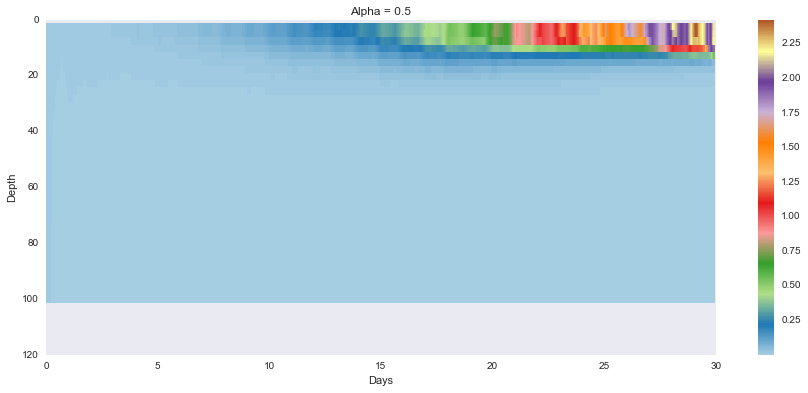

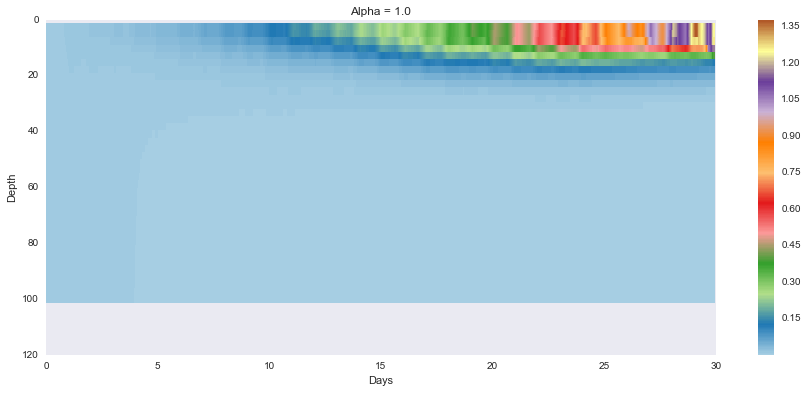

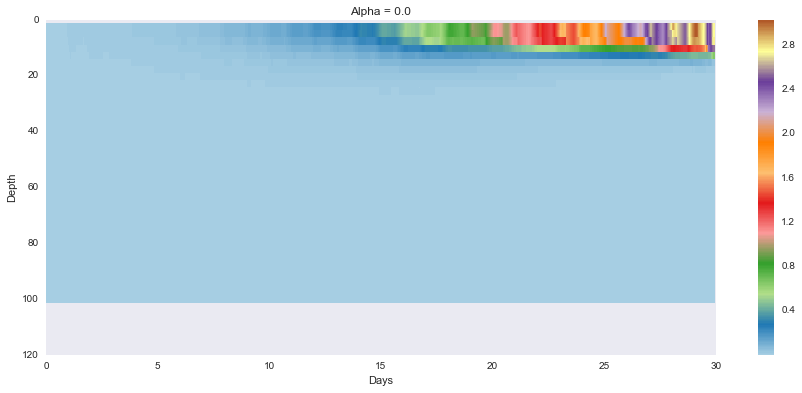

In [68]:
for alpha in dataset_dict:
    z = dataset_dict[alpha].deptht.values
    t= np.array([float(x) for x in dataset_dict[alpha].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(15,6))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[alpha].PHY.values[:,:,2,2].T)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("Alpha = " + str(alpha))
    plt.xlabel("Days")
    plt.ylabel("Depth")

In [ ]:
dataframe_list = []
for alpha in dataset_dict:
    df = dataset_dict[alpha].to_dataframe()
    df['ALPHA'] = alpha
    dataframe_list.append(df)

df = pd.concat(dataframe_list)

df_subset = df.query('x in [1,3] and y == 2 and axis_nbounds == 0') # Subset for certain grids of the 5x5
df_subset.reset_index(inplace=True) # Get rid of that multiindex madness

In [54]:
depth_subset = df_subset.deptht.unique()[1:6] #pick some of the depths to graph

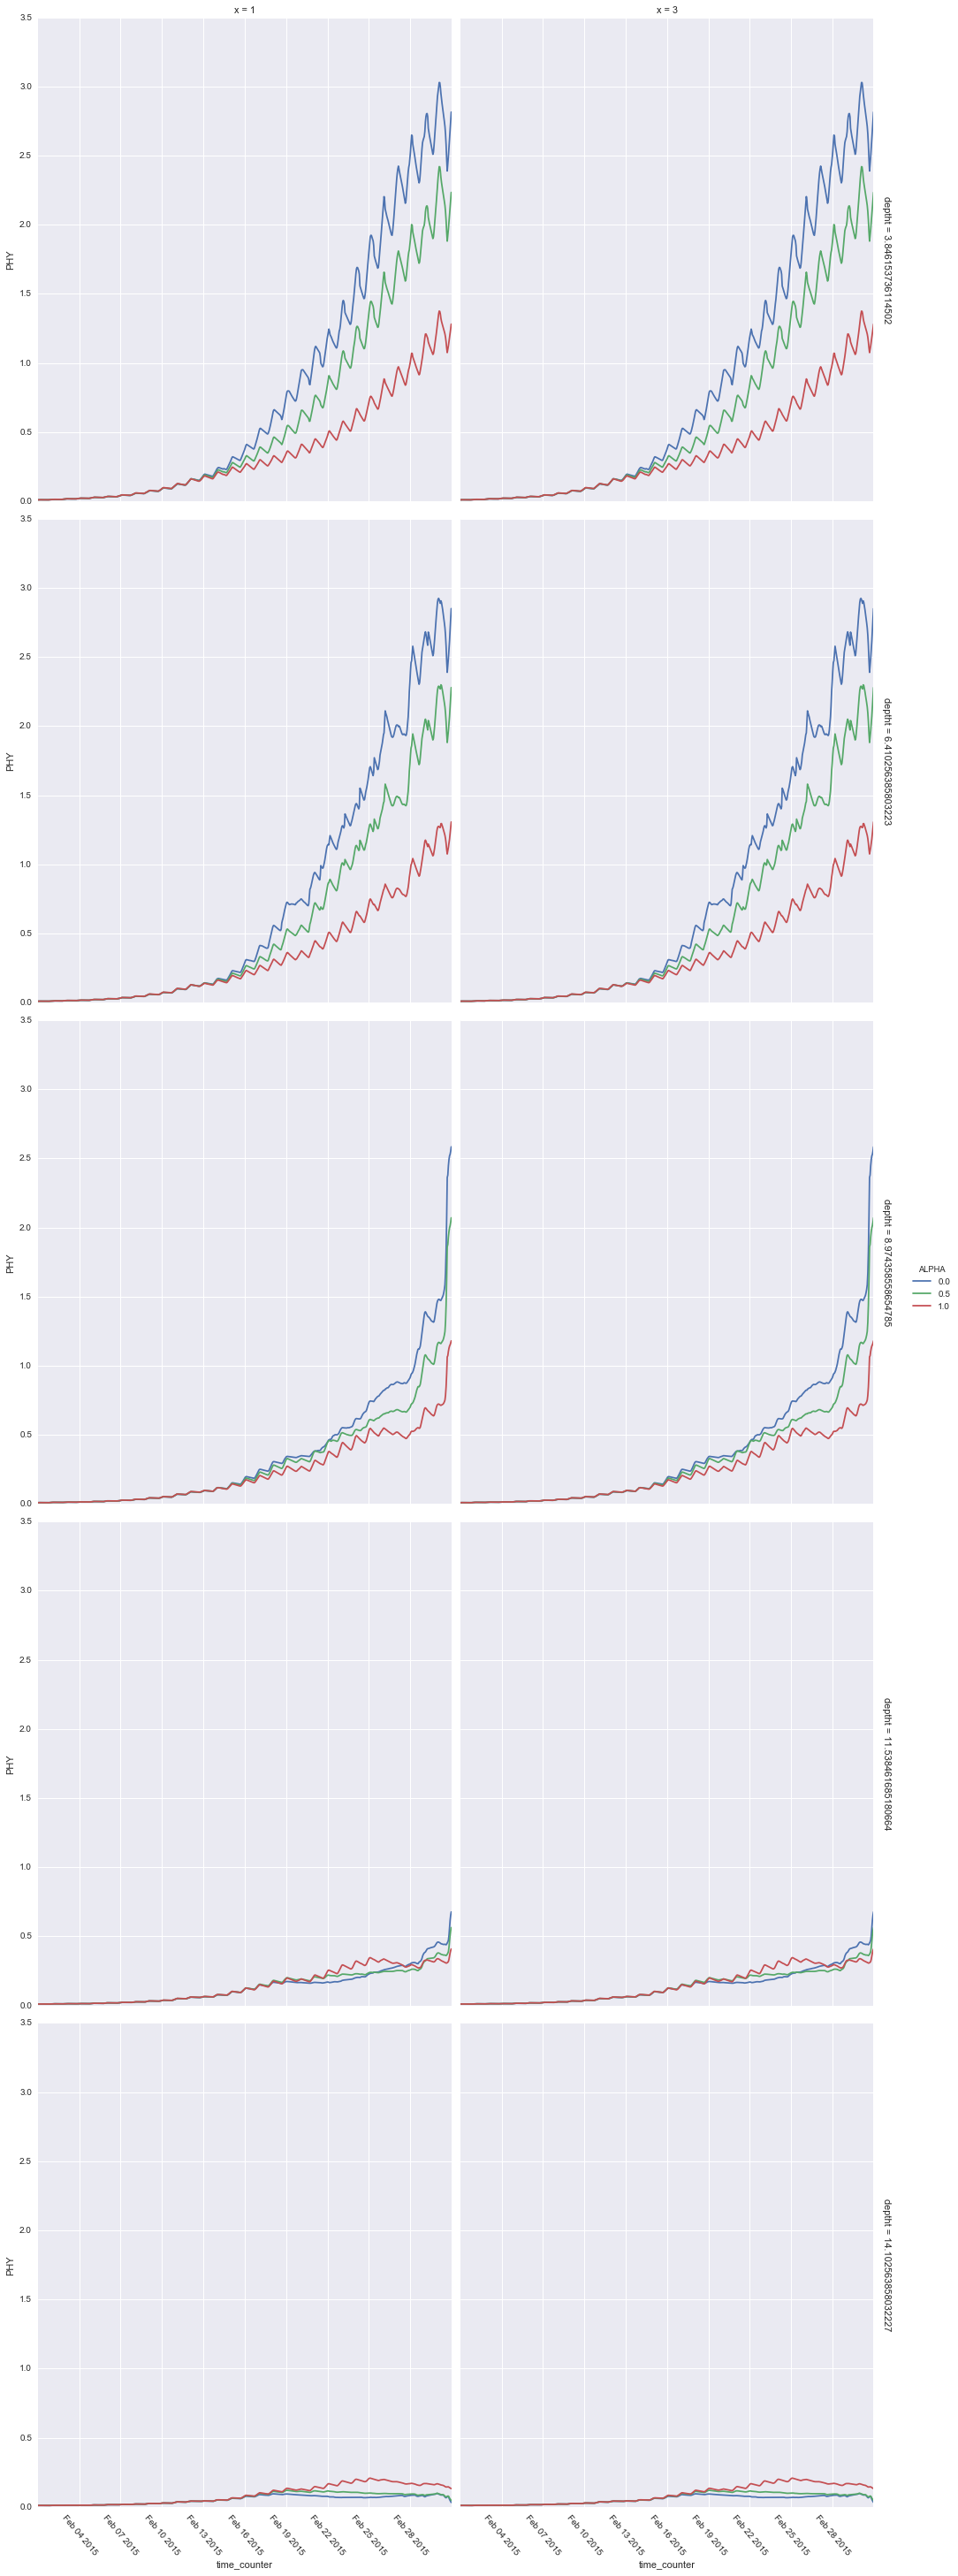

In [60]:
g = sns.FacetGrid(df_subset.query('deptht in @depth_subset'), row="deptht", col="x", hue = "ALPHA", margin_titles=True, size = 8, aspect = 0.9)
g.map(plt.plot, "time_counter", "PHY")
g.add_legend()
g.set_xticklabels(rotation=-50)

#Plot of PHY population over time at several different locations 
#(different colored lines for different simulation alpha value)
#Depth increases downwards, and there are two x positions plotted for each depth

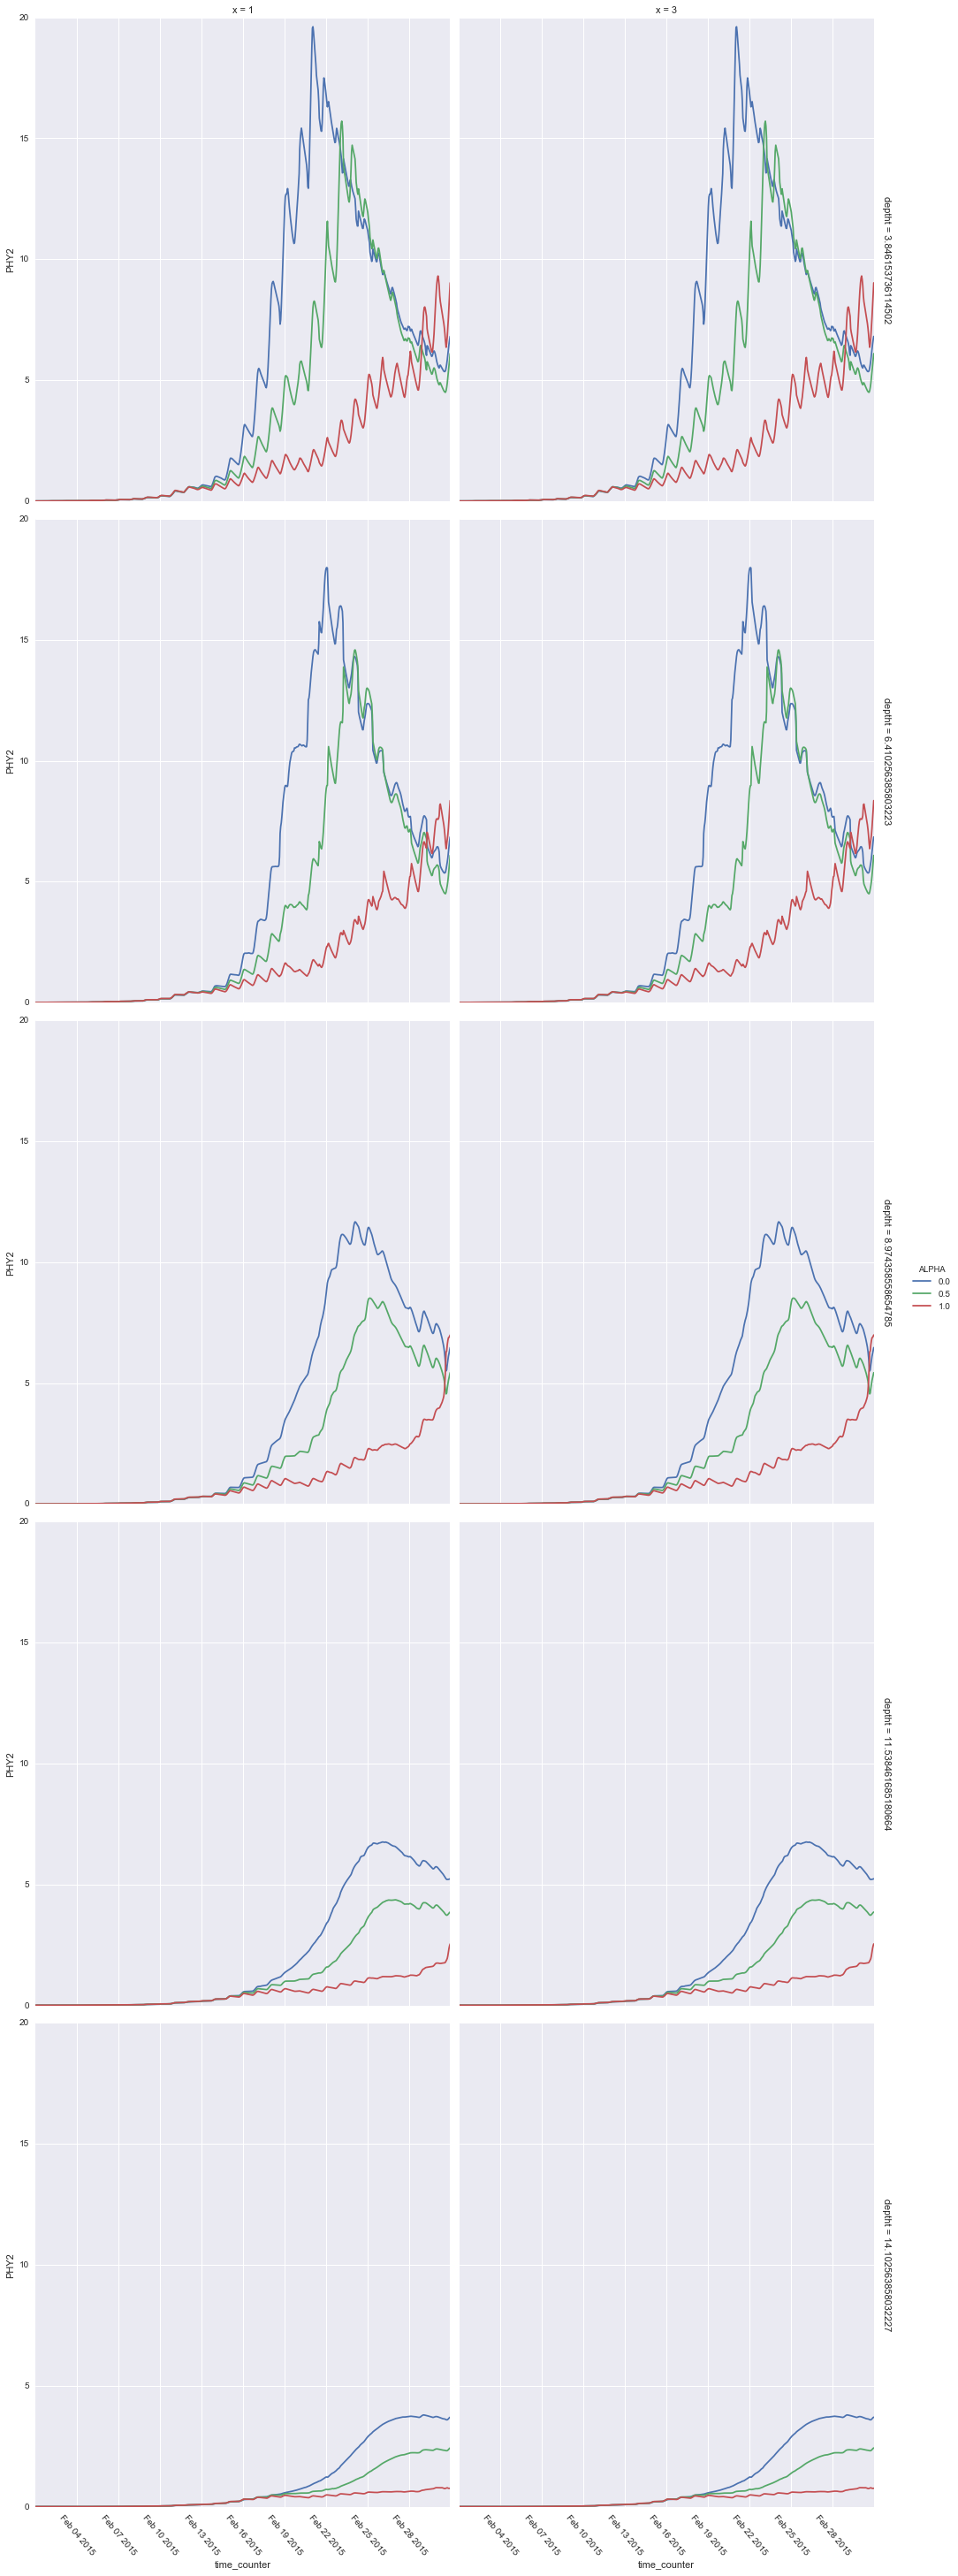

In [61]:
g = sns.FacetGrid(df_subset.query('deptht in @depth_subset'), row="deptht", col="x", margin_titles=True, hue = "ALPHA", size = 8, aspect = 0.9)
g.map(plt.plot, "time_counter", "PHY2")
g.add_legend()
g.set_xticklabels(rotation=-50)

# Plot of PHY2 population

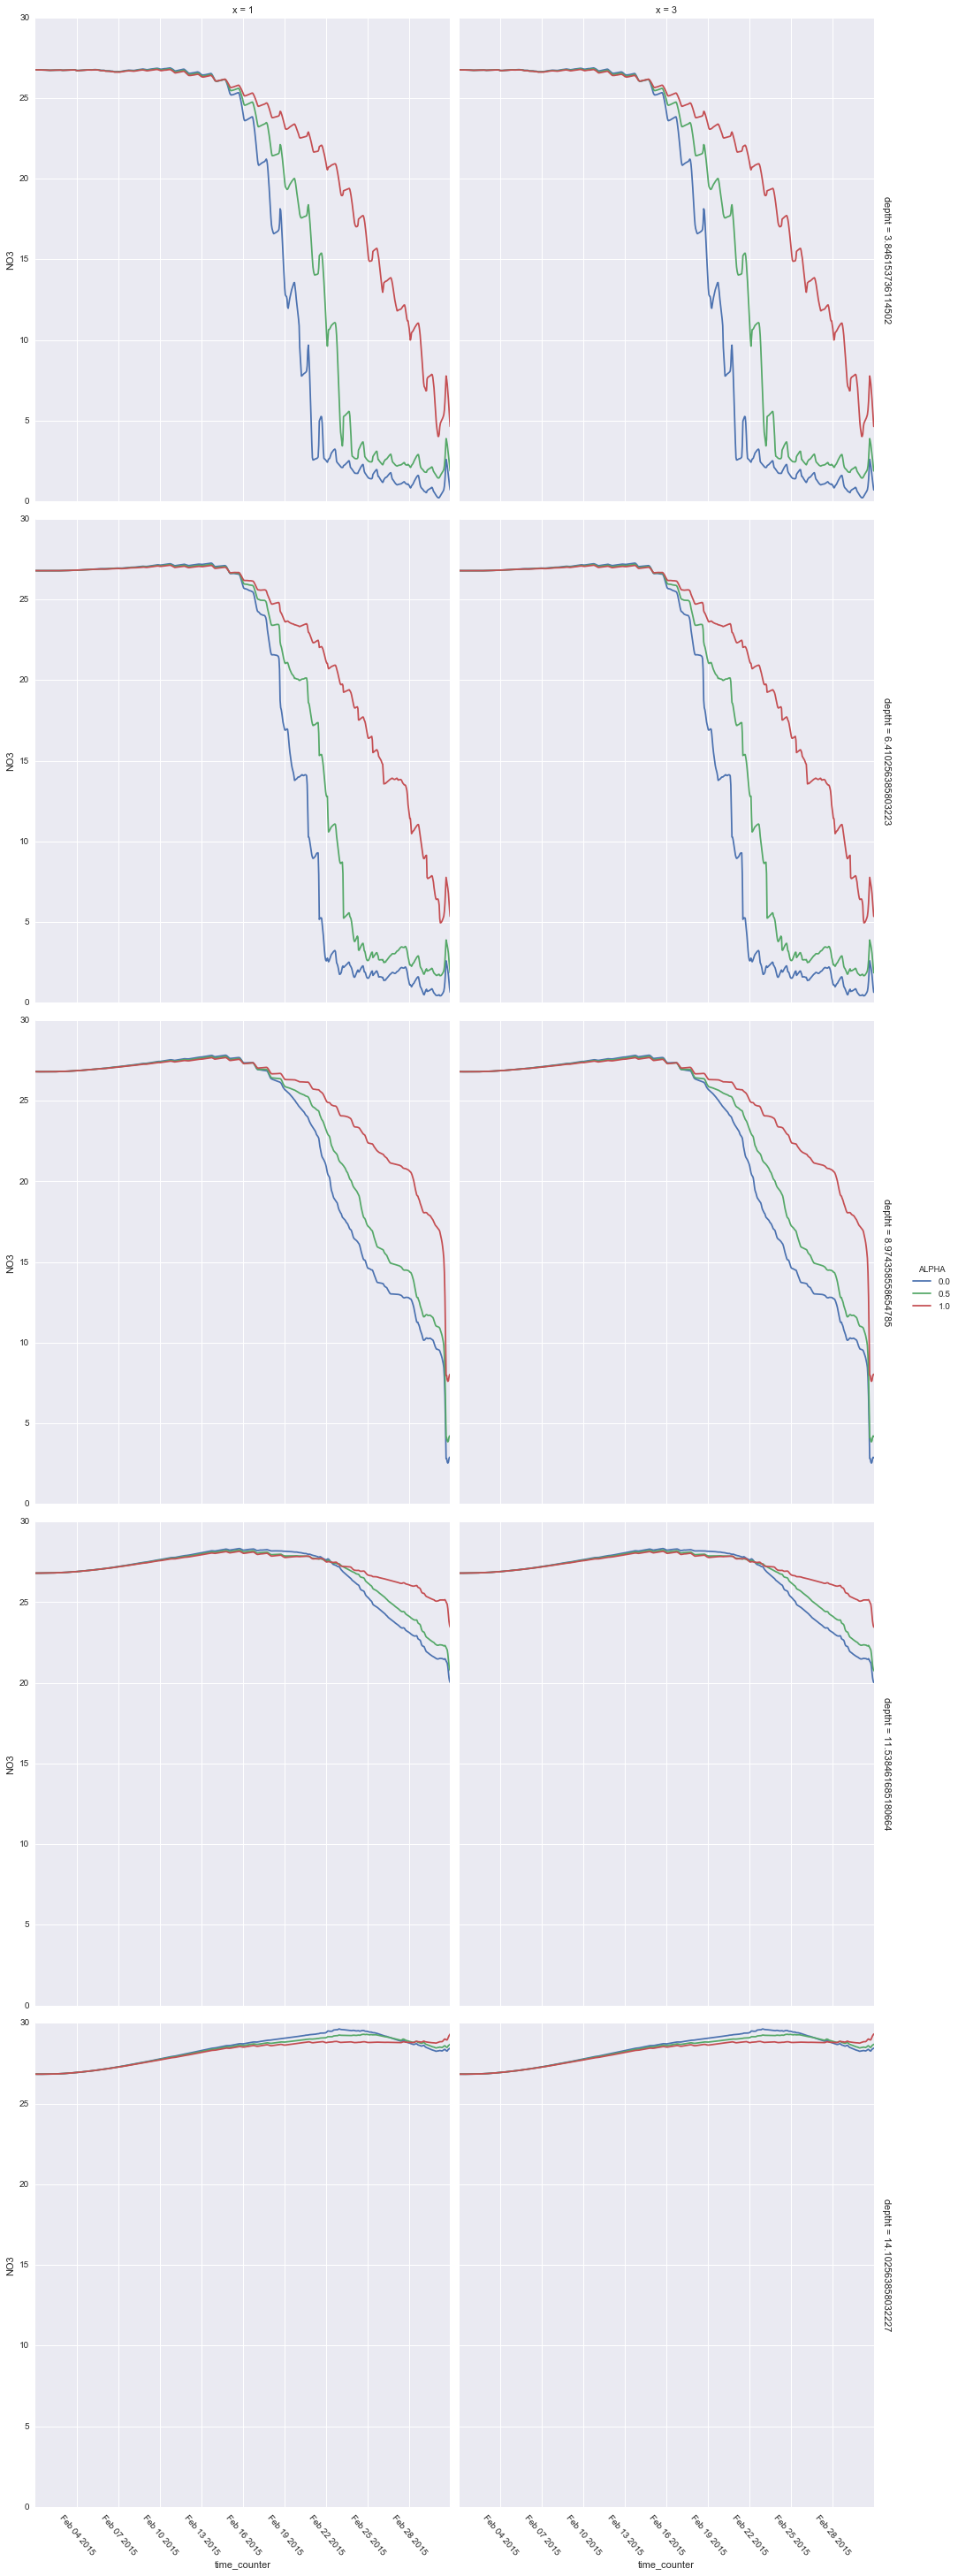

In [62]:
g = sns.FacetGrid(df_subset.query('deptht in @depth_subset'), row="deptht", col="x", margin_titles=True, hue = "ALPHA", size = 8, aspect = 0.9)
g.map(plt.plot, "time_counter", "NO3")
g.add_legend()
g.set_xticklabels(rotation=-50)

# Plots of NO3 concentration over time